# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre:Benjamin Escobar Jaramillo
*Métodos computacionales 2025-I*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, CubicHermiteSpline
import sympy as sp

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [ ]:
#Perfecto, tenemos todos los datos que necesitamos! pues, aunque es bien sabido que hermite necesita la derivada en los puntos...
#... la derivada de la posición es la velocidad, es decir, nos dan todo lo que necesitamos! asi que a trabajar.
tiempos = np.array([0.0, 3.0, 5.0, 8.0, 13.0]) # segundos
distancias = np.array([0.0, 225.0, 383.0, 623.0, 993.0]) # metros
velocidades = np.array([75.0, 77.0, 80.0, 74.0, 72.0]) # metros/segundo

tiempo_interpolado=np.linspace(min(tiempos), max(tiempos)) #Donde vamos a interpolar

HermitePosicion=CubicHermiteSpline(tiempos,distancias,velocidades)
CubicPosicion=CubicSpline(tiempos,distancias,bc_type='natural') #No olvidemos el criterio bc_type natural, para mayor precisión.

print(f'Con Hermite, en t=10s, predecimos una posicion x={HermitePosicion(10)} m')
print(f'Con CubicSpline, en t=10s, predecimos una posicion x={CubicPosicion(10)} m')


Con Hermite, en t=10s, predecimos una posicion x=771.96 m
Con CubicSpline, en t=10s, predecimos una posicion x=774.8639004149377 m


In [ ]:
#Ya que tenemos un polinomio de interpolación de distancias,solo me resta derivarlo para hallar las velocidades!!
HermiteVelocidad=HermitePosicion.derivative()       #Nuevas funciones de velocidades!!!
CubicVelocidad=CubicPosicion.derivative()

print(f'Con Hermite, en t=10s, predecimos una velocidad V={HermiteVelocidad(10)} m/s')
print(f'Con CubicSpline, en t=10s, predecimos una velocidad V={CubicVelocidad(10)} m/s')

Con Hermite, en t=10s, predecimos una velocidad V=74.64 m/s
Con CubicSpline, en t=10s, predecimos una velocidad V=74.1609958506224 m/s


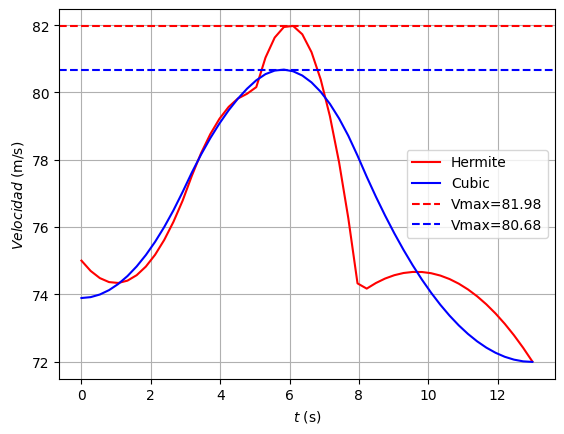

In [ ]:
'''
Finalmente, hallemos la velocidad máxima
'''
maxVHErmite=max(HermiteVelocidad(tiempo_interpolado)) #hacemos un arreglo que inmediatemente arroje el termino mayor de c/u
maxVCubic=max(CubicVelocidad(tiempo_interpolado))



plt.plot(tiempo_interpolado,HermiteVelocidad(tiempo_interpolado),label='Hermite',color='r')
plt.plot(tiempo_interpolado,CubicVelocidad(tiempo_interpolado),label='Cubic',color='b')
plt.axhline(maxVHErmite,ls='--',c='r',label=f'Vmax={round(maxVHErmite,2)}')
plt.axhline(maxVCubic,ls='--',c='b',label=f'Vmax={round(maxVCubic,2)}')
plt.xlabel('$t$ (s)')
plt.ylabel('$Velocidad$ (m/s)')
plt.grid()
plt.legend()

# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

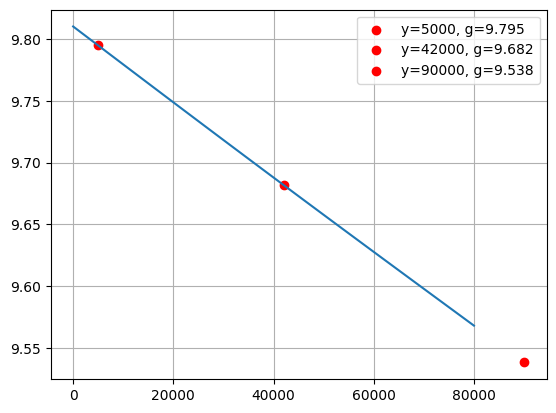

In [ ]:
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
yinter=np.linspace(min(y),max(y),100)   #Hacemos nuestro mapa interpolador (para la gràfica!)


def diferencias_divididas(x,y,i,j):    #Y comenzamos.
  if i==j:
    return y[i]                        #Condición para cuando son iguales!!
  else:
    num=diferencias_divididas(x,y,i+1,j)-diferencias_divididas(x,y,i,j-1)         #Se emplea el poder de la recursión!
    den=x[j]-x[i]
    return num/den


def coeficientes(x,y):                              #Ahora tomamos es unicamente la "primera columna" de nuestra tabal de dif div
  coef=np.zeros_like(x,dtype=float)
  for j in range(len(x)):
    coef[j]=diferencias_divididas(x,y,0,j)
  return coef


def newt(x,y,x_interp):                            #Y finalmente, se construye el polinomio. (P)
  a=coeficientes(x,y)
  P= a[0]
  prod=1
  for i in range(1,len(x)):       #Empieza en 1, pues ya tenemos a[0]
    prod*=(x_interp-x[i-1])
    P+=a[i] * prod

  return P

plt.plot(yinter,newt(y,g,yinter))
plt.scatter(5000,newt(y,g,5000),color='r',label=f'y=5000, g={round(newt(y,g,5000),3)}')
plt.scatter(42000,newt(y,g,42000),color='r',label=f'y=42000, g={round(newt(y,g,42000),3)}') #Y posicionamos nuestros puntos
plt.scatter(90000,newt(y,g,90000),color='r',label=f'y=90000, g={round(newt(y,g,90000),3)}')  #Wow! una especie de extrapolación!
plt.grid()
plt.legend()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



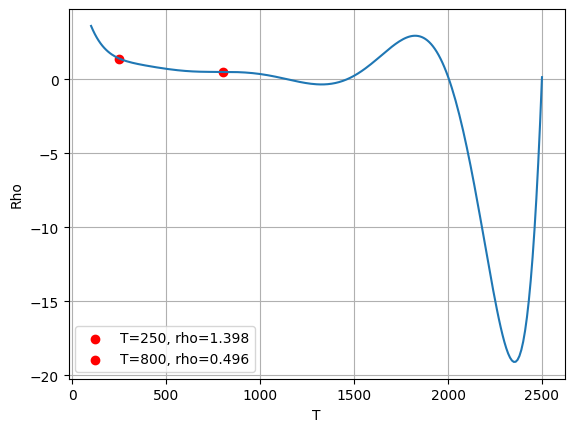

In [ ]:
T = np.array([100.0, 200.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

Tinterpolado=np.arange(min(T),max(T)+10,10) #Con el +10, tomamos hasta 2500!

plt.plot(Tinterpolado,newt(T,rho,Tinterpolado))


plt.scatter(250,newt(T,rho,250),color='r',label=f'T=250, rho={round(newt(T,rho,250),3)}')
plt.scatter(800,newt(T,rho,800),color='r',label=f'T=800, rho={round(newt(T,rho,800),3)}')

'''si desea visualizar T=3000k (no recomendado)'''
#plt.scatter(3000,newt(T,rho,3000),color='r',label=f'T=3000, rho={round(newt(T,rho,3000),3)}')

plt.xlabel('T')
plt.ylabel('Rho')
plt.grid()
plt.legend()

In [ ]:
'''Y finalmente, para no echar a perder la gráfica, a continuación el valor explicito, con T=3000K'''
print(f'La densidad del aire con T=3000K, es igual a {newt(T,rho,3000)}')

La densidad del aire con T=3000K, es igual a 1561.165866794854


# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

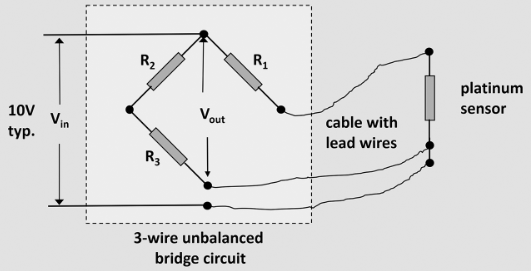




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [ ]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

Fvolt=CubicSpline(resistencia,voltaje,bc_type='natural')

print(f'Con las condiciones proporcionadas, con una resistencia de 139.27m obtenemos una diferencia de potencial de {Fvolt(139.27)}')


Con las condiciones proporcionadas, con una resistencia de 139.27m obtenemos una diferencia de potencial de -0.3699510277321739


In [ ]:
'''Si la salida es 0... podriamos hacer algo similar a f(x)=0... es decir... raices!!!'''
from scipy.optimize import newton

newton(Fvolt,120) #usamos el punto 120, pues segun nuestro arreglo, es lo mas cercano a un 0...!

np.float64(119.9679405715541)

In [ ]:
'''Note que el valor obtenido, es practicamente igual al de la tercera resistencia!!... Sospechoso, huh?'''

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

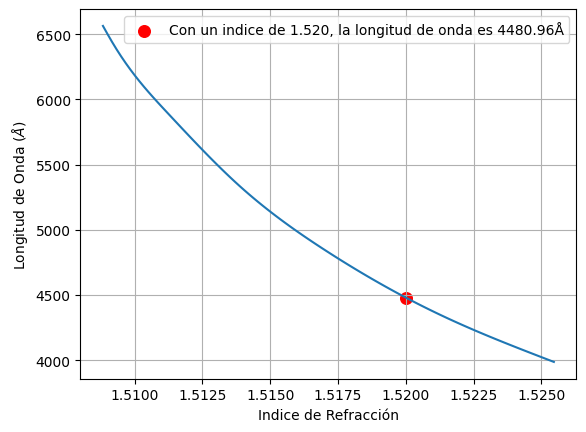

In [ ]:
#Empleemos splines cubicos! son confiables, y solo requieren los puntos. Trabajemos entonces!!

lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

OndaRefraccion=CubicSpline(indice_refraccion,lambda_angstrom,bc_type='natural') #Hacemos nuestra función de interpolacion!

refraccionInterpol=np.linspace(min(indice_refraccion),max(indice_refraccion),100)
plt.plot(refraccionInterpol,OndaRefraccion(refraccionInterpol))
plt.scatter(1.520,OndaRefraccion(1.520),color='r',
            label=f'Con un indice de 1.520, la longitud de onda es {  round( float(OndaRefraccion(1.520)),2)}Å',
            s=70)
plt.xlabel('Indice de Refracción')
plt.ylabel('Longitud de Onda $(Å)$')
plt.legend()
plt.grid()